In [1]:
from itertools import product
from typing import Dict, List, Any

import numpy as np
import matplotlib.pyplot as plt

from IOData.IOData import InputRule

from simulators.track_simulator import TrackSimulator
from simulators.simulation_settings import SafetyFilterTypes, TrackFilterTypes, SimulationInputRule, ModelType
from tools.simualtion_results import Results

from tools.simple_track_generator import trackGenerator

In [2]:
save_fig = False

simualte_type = 'TRACK_SIMULATE'

Simulator = {
    # 'SINGLE_CURVATURE'  : SingleCurvatureSimulator,
    'TRACK_SIMULATE'    : TrackSimulator,
}.get(simualte_type)

simulator = Simulator()
simulator.a_d_max = 3
simulator.delta_d_max = 0.2
simulator.use_saved_data = False
simulator.save_data = False
simulator.simulate_model_type = ModelType.KINEMATIC
simulator.data_model_type = ModelType.KINEMATIC
simulator.t_sim = 5
simulator.global_initial_state = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
simulator.cur = 1/0.3
simulator.track_fun_name = 'oval_track'

simulator.t_data = 10.0
simulator.data_input_rule = InputRule.RANDOM_2_WITH_MEAN

random_seeds = [0]
track_filter_types = [
    # TrackFilterTypes.SINGLE_SEGMENT_ADD_DATA,
    TrackFilterTypes.SINGLE_SEGMENT,
    ]
filter_types = [
    SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL,
    SafetyFilterTypes.INDIRECT_FITTING_TERMINAL,
    SafetyFilterTypes.INDIRECT_FIX_MU,
    SafetyFilterTypes.INDIRECT_ZERO_V,
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING,
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA,
    SafetyFilterTypes.INDIRECT_STOP,
    ]
filter_params: Dict[SafetyFilterTypes, List[Dict[str, Any]]] = {
    SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FIX_MU: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.05, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.05, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_ZERO_V: [
        # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_STOP: [
        # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [{'lam_sig': 10000}, {'lam_sig': 50000}, {'lam_sig': 100000}],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_STOP: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [{'lam_sig': 200000}],
    # SafetyFilterTypes.INDIRECT_FIX_MU: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 150000, 'L': 100, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    #     # {'lam_sig': 200000, 'L': 100, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     ], 
    # SafetyFilterTypes.INDIRECT_ZERO_V: [ 
    #     {'lam_sig': 150000, 'L': 150, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    #     # {'lam_sig': 200000, 'L': 200, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}
    #     ],
    # SafetyFilterTypes.INDIRECT_STOP: [{'lam_sig': 100000}],
    }
simulation_input_rules = [SimulationInputRule.MAX_THROTTLE]


dict_results = simulator.simulate_multi(random_seeds, track_filter_types, filter_types, filter_params, simulation_input_rules)


 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL, simulation_input_type=SimulationInputRule.MAX_THROTTLE


/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/LATI.py:138: UserWarning: System not observable!
  warn("System not observable!")
/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/ErrorKinematicAcceLATI.py:163: UserWarning: mu is not in [-pi/2, pi/2]
  warn('mu is not in [-pi/2, pi/2]')


vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!

 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FITTING_TERMINAL, simulation_input_type=SimulationInputRule.MAX_THROTTLE
Fited steady state input: [ 0.         -0.02575389]
Fited steady state output: [ 0.         -0.01369693  0.        ]
Fited steady state input: [0.         0.48649624]
Fited steady state output: [  0.         -14.53330093   0.        ]
Fited steady state input: [ 0.         -0.02575389]
Fited steady state output: [ 0.         -0.01369693  0.        ]
Fited steady state input: [0.         0.48649624]
Fited steady state output: [  0.         -14.53330093   0.        ]
Fited steady state input: [ 0.         -0.02575389]
Fited steady state output: [ 0.         -0.01369693  0.        ]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment

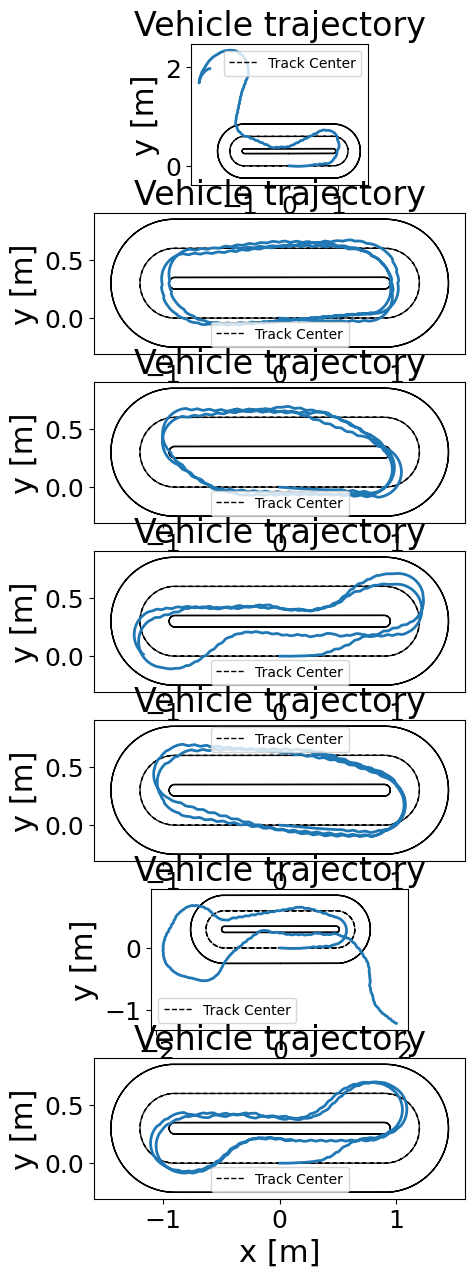

In [3]:
# plot global trajectory and track
random_seed = random_seeds[0]
n_rows, n_cols = len(filter_types), len(simulation_input_rules)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, figsize=(20*n_rows,15*n_cols))
for i, j in product(range(n_rows), range(n_cols)):
    results = dict_results[(random_seed, track_filter_types[0], filter_types[i], simulation_input_rules[j])][0]
    if results is not None:
        results.plot_vehicle_trajectory(ax=axs[i,j], gen=simulator.track_generator)
plt.show()
if save_fig:
    fig.savefig('track_simulation.png')

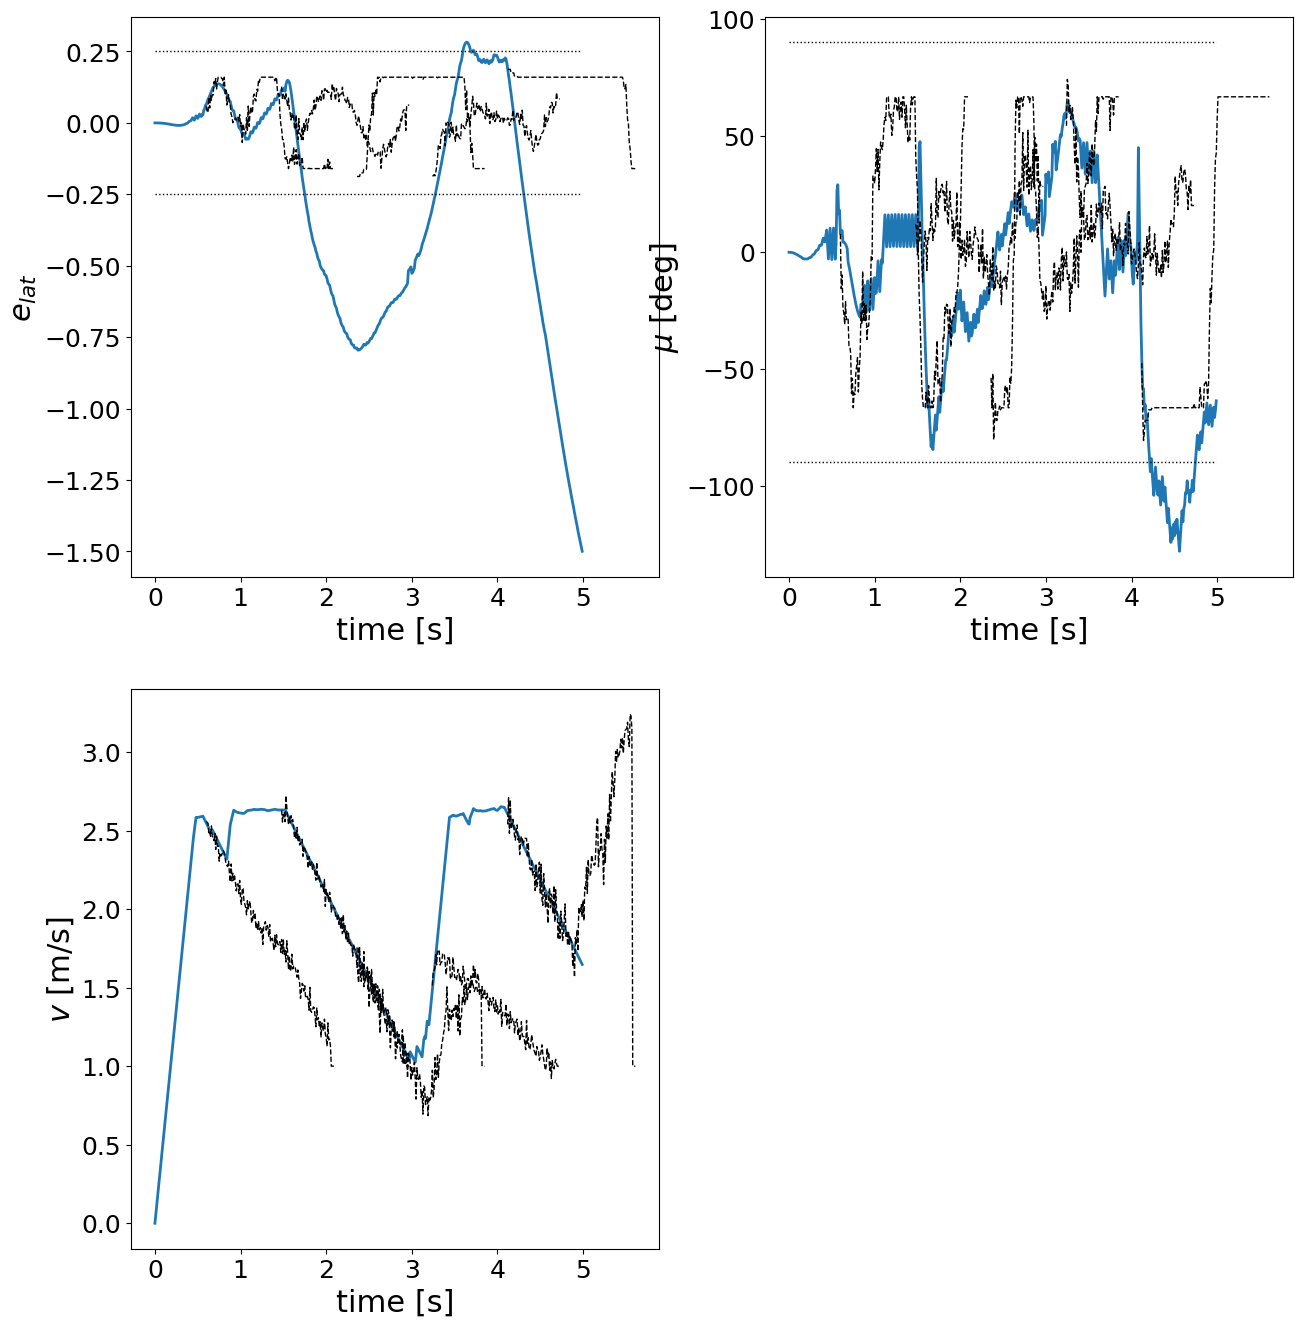

In [4]:
# choose one result to plot details
results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA, simulation_input_rules[0])][0]
# results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V, simulation_input_rules[0])][0]

# plot given error dynamics trajectory
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_predicted_error_slices(0, ax)
ax = plt.subplot(222)
results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_predicted_error_slices(1, ax)
ax = plt.subplot(223)
results.plot_error_trajectory(2, ax)
results.plot_predicted_error_slices(2, ax)
plt.show()

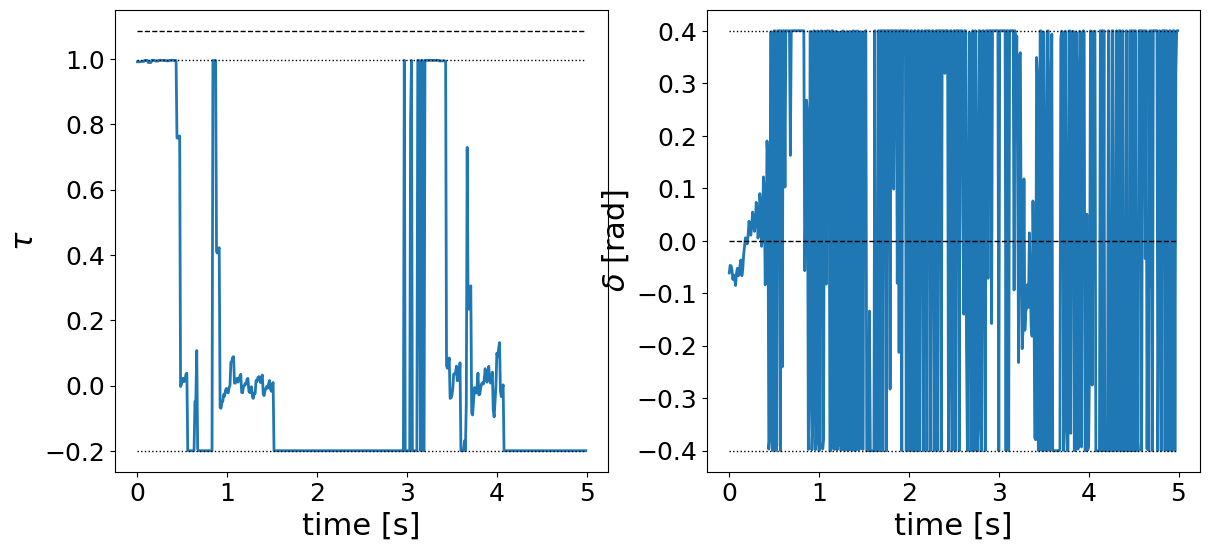

In [5]:
# plot given and applied inputs
plt.figure(figsize=(14,6))
ax = plt.subplot(121)
results.plot_input_applied(0, ax, constraint=(simulator.a_min*simulator.m, simulator.a_max*simulator.m))
results.plot_input_obj(0, ax)
ax = plt.subplot(122)
results.plot_input_applied(1, ax, constraint=(-simulator.delta_max, simulator.delta_max))
results.plot_input_obj(1, ax)
plt.show(block=True)

In [6]:
sigma_max = results.calculate_sigma_infty_value()
print(sigma_max)

(1.9344039731139517e-08, 3.1126383854748685)


In [7]:
sigma_max[1]/np.pi*180

178.3410426381246

In [8]:
def plot_average_itervention(ax: plt.Axes, results: Dict[TrackFilterTypes, Results]) -> plt.Axes:
    """Plot the average intervention for the input corresponds to the input."""
    width = 0.3 # width of bar

    x = np.arange(len(results))
    input_names = ['Torque', 'steering']

    offset = -width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[0],2) for result in results.values()], width, label=input_names[0], color='tab:blue')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel('Torque Intervention')
    ax.legend(loc='upper left', ncols=2)

    ax = ax.twinx()  # instantiate a second axes that shares the same x-axis
    offset = width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[1],2) for result in results.values()], width, label=input_names[1], color='tab:red', hatch='///')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Steering Intervention')
    ax.set_title('MSR Input Intervention for Different Terminal Ingredients')
    ax.set_xticks(x, [key.value for key in results.keys()])
    ax.legend(loc='upper right', ncols=2)
    

{<SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: 'fix mu and \n add data'>: <tools.simualtion_results.Results object at 0x1070c68e0>, <SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: 'fitting steady state'>: <tools.simualtion_results.Results object at 0x1070aeac0>, <SafetyFilterTypes.INDIRECT_FIX_MU: 'fix mu'>: <tools.simualtion_results.Results object at 0x1683e1a60>, <SafetyFilterTypes.INDIRECT_ZERO_V: 'stop at \n center line'>: <tools.simualtion_results.Results object at 0x1070d6fa0>, <SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING: 'fix mu with weighting'>: <tools.simualtion_results.Results object at 0x16c163490>, <SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: 'fix mu with\n weighting and add data'>: <tools.simualtion_results.Results object at 0x16917ddc0>, <SafetyFilterTypes.INDIRECT_STOP: 'stop anywhere \n on the track'>: <tools.simualtion_results.Results object at 0x167123160>}


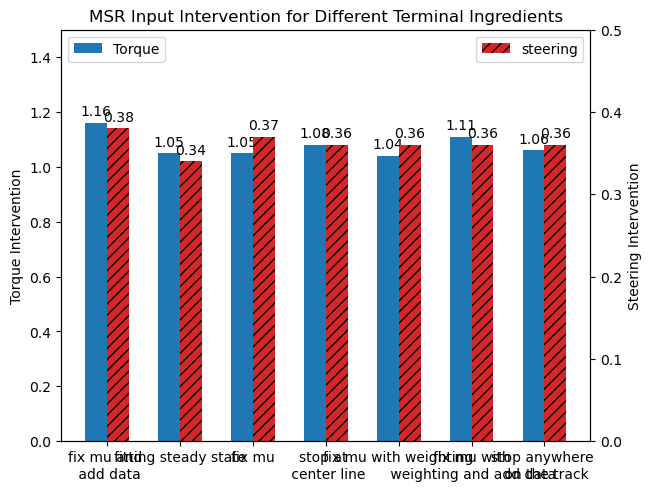

In [9]:
results_dict_filter_types = {
    key[2]: result_list[0] for key, result_list in dict_results.items()
}
print(results_dict_filter_types)
fig, ax = plt.subplots(layout='constrained')

ax = plot_average_itervention(ax, results_dict_filter_types)

In [10]:
simulator.systems[0].get_noise()

matrix([[-9.41904720e-05],
        [-2.83232919e-03],
        [ 2.15762141e-03]])

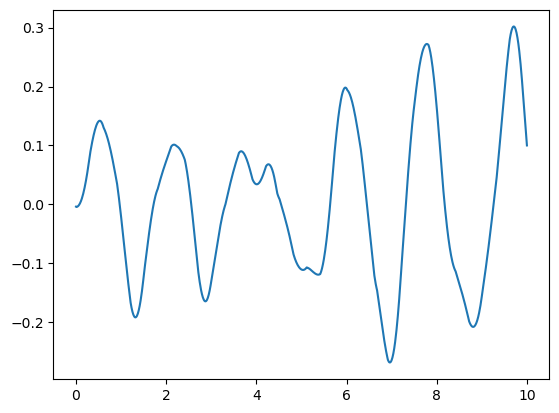

In [11]:
io_data = simulator.io_data_dict[1/0.3]

plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[0,0] for y in io_data._output_data])

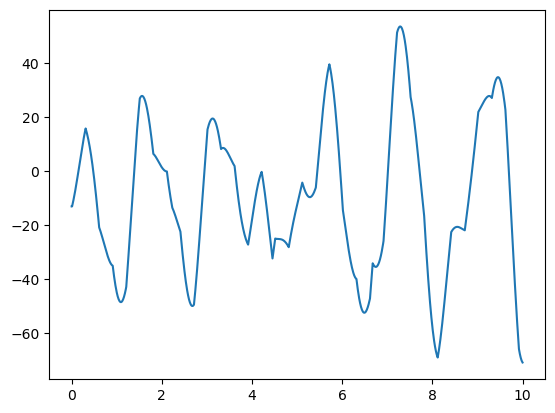

In [12]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[1,0]*180/np.pi for y in io_data._output_data])

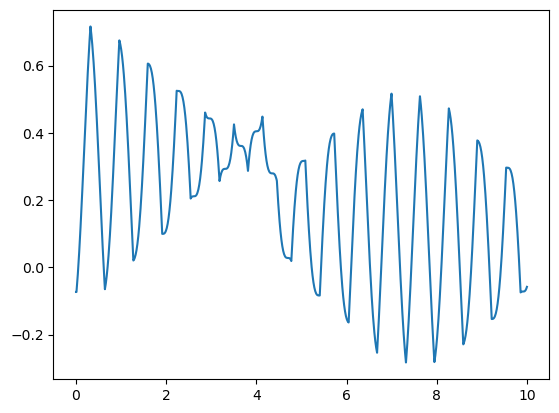

In [13]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[2,0] for y in io_data._output_data])

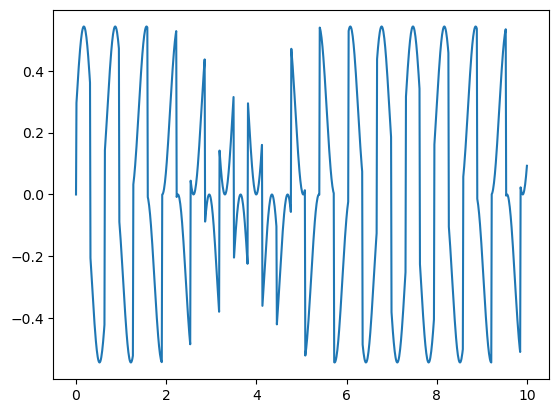

In [14]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[0,0] for u in io_data._input_data])

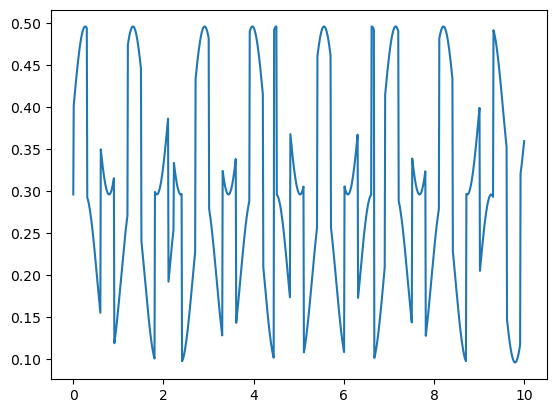

In [15]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[1,0] for u in io_data._input_data])

In [16]:
print(simulator.systems[1].get_zero_input())
print(simulator.systems[1].get_zero_state())

[0.         0.29568153]
[ 0.         -0.17421323  1.          0.        ]


In [17]:
U, S, V = np.linalg.svd(io_data.H_input)
print(S)

[1.19755662e+02 9.09268824e+01 8.58736739e+01 2.47827756e+01
 2.28845741e+01 2.16633536e+01 2.15292634e+01 1.81065677e+01
 1.77060389e+01 1.64953679e+01 1.61018972e+01 1.36432822e+01
 1.30252512e+01 1.29521918e+01 1.28903514e+01 1.00141646e+01
 9.41960243e+00 9.23228712e+00 9.19285237e+00 8.35016930e+00
 8.13014911e+00 7.20036494e+00 7.19617736e+00 7.13845644e+00
 7.01056886e+00 6.93019479e+00 6.61769617e+00 5.88858086e+00
 5.86053663e+00 5.80789924e+00 5.21219592e+00 5.17968458e+00
 5.17584627e+00 4.98664447e+00 4.96370347e+00 4.59832403e+00
 4.41584480e+00 4.33853076e+00 4.33208549e+00 4.11595779e+00
 4.01784316e+00 3.96020168e+00 3.91315398e+00 3.86629284e+00
 3.84696417e+00 3.83645887e+00 3.83162044e+00 3.80433174e+00
 3.75459205e+00 3.72407740e+00 3.70465894e+00 3.68149704e+00
 3.62677240e+00 3.47931634e+00 3.45225370e+00 3.44938717e+00
 3.44110913e+00 3.43221866e+00 3.35572483e+00 3.17538097e+00
 3.14321753e+00 3.12033905e+00 3.11367940e+00 3.10700000e+00
 3.06894763e+00 3.021601